## Decision Tree Visualization

### Decision Tree
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each node finds the best threshold on that feature to further classify/predict more accurately, each branch represents an outcome of that threshold, and each leaf node holds a class label.
<br><br>
<img src="./data/image1.PNG">

In [32]:
from matplotlib import pyplot as plt # For plotting
from sklearn import datasets # For loading standard datasets
from sklearn.tree import DecisionTreeClassifier # To run decision tree model
from sklearn import tree # to visualize decision trees
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

#### Iris Dataset Description:
- Classes: 3
- Samples per class: 50
- Samples total: 150
- Dimesionaltiy: 4
- Source: https://archive.ics.uci.edu/ml/datasets/iris

<br>
<strong>Quick Tip:</strong> sklearn.datasets has some toy datasets, the package also has helpers to fetch larger datasets commonly used by the machine learning community

In [33]:
# Prepare the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [34]:
# Initialize the model
clf = DecisionTreeClassifier()
# Fit the model
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Task
- Train your own decision tree and play with the following hyper-parameters then state your observations on at least 15 different hyper-parameter settings. Following are only some of the parameters:
    - __Must read__: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    - max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    - min_samples_split : The minimum number of samples required to split an internal node.
    - min_samples_leaf : The minimum number of samples required to be at a leaf node. This may have the effect of smoothing the model, especially in regression.
    - random state :  Controls the randomness of the estimator
    
- Write a function to calculate the accuracy
- Print accuracies for each hyper-parameter setting used. Print in following format:
    ```
    1. PARAMS[random_state=1, max_depth=....] , Accuracy=0.97
    2. PARAMS[random_state=42, min_samples_split=....] , Accuracy=0.94
    ..
    .
    ```
- Perform the same set of acitvites on different dataset: https://gist.github.com/kudaliar032/b8cf65d84b73903257ed603f6c1a2508


In [35]:
# initialise and then Fit the classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
# Gives text representation to the decision tree trained
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [37]:
# To save the above info in a text file
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

### How to Visualize Decision Trees using Matplotlib
Scikit-learn version >=0.21.0 allows Decision Trees to be plotted with matplotlib using 'sklearn.tree.plot_tree'

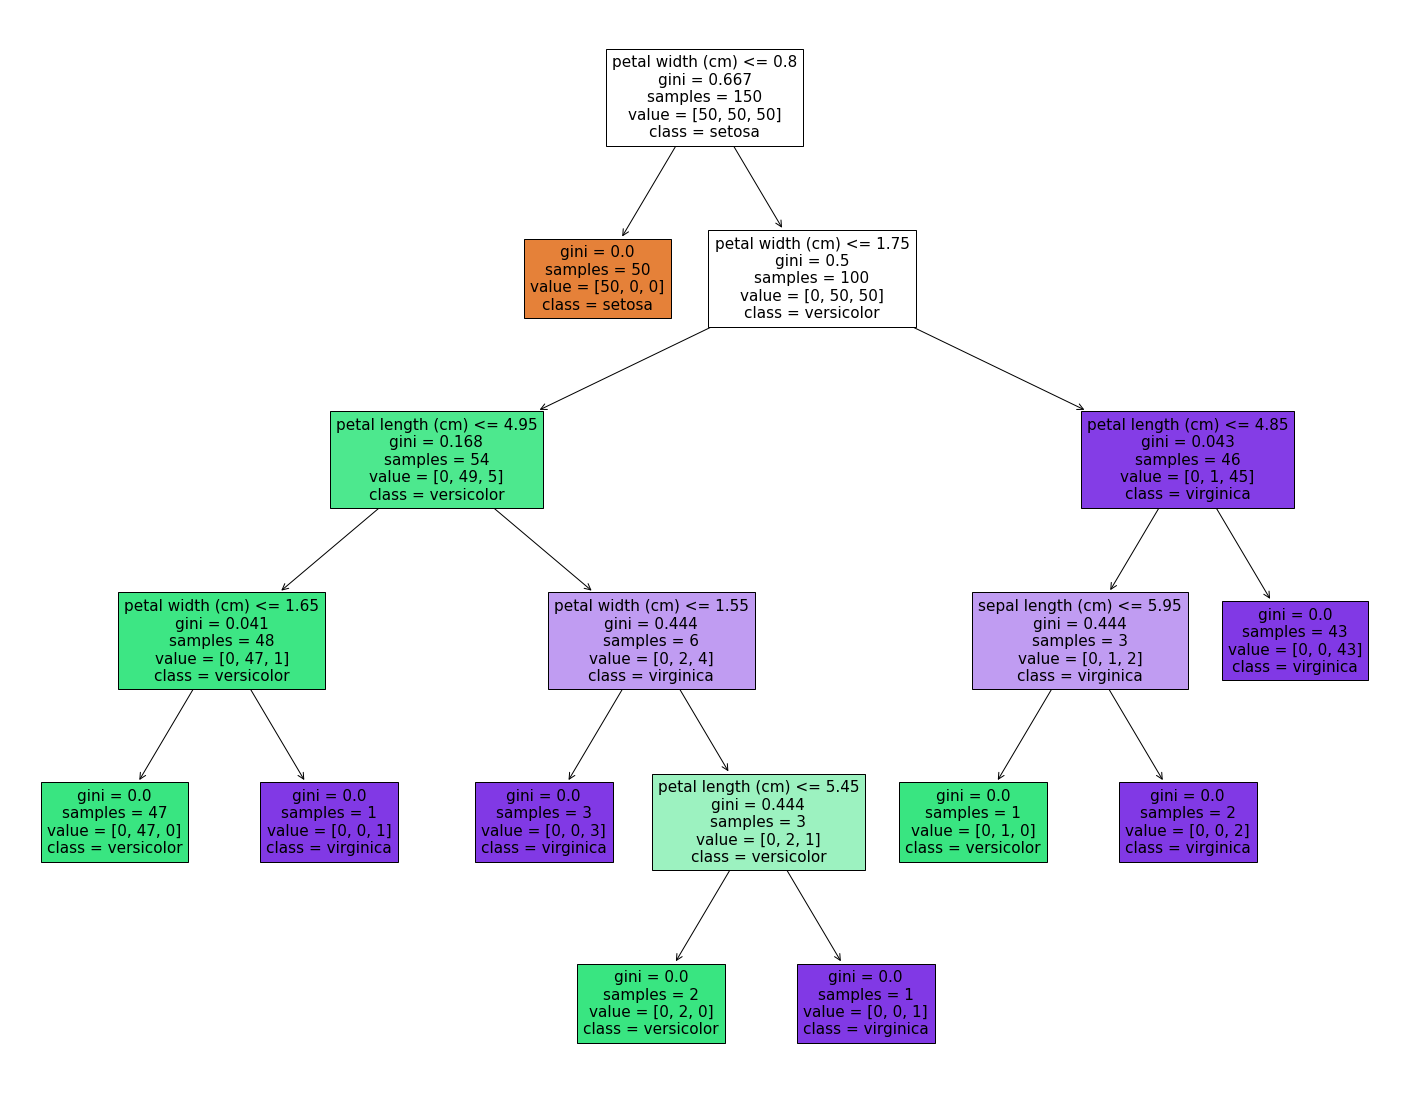

In [38]:
# Visualize the results in a beautiful manner using sklearn plot_tree
# Look documentation for modifying fonts: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

 ##### In the above figure color of the nodes represent the majoritiy of the class

In [39]:
# TODO: Write accuracy function here
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=123)
y_pred=clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

1.0

In [40]:
# TODO: Print 15 hyperparam settings along with accuracy
for i in range(10,20):
  clf1=DecisionTreeClassifier(criterion='gini', splitter='random',min_samples_split=2,min_samples_leaf=5,max_leaf_nodes=10,max_depth=i)
  clf1.fit(X,y)
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
  y_pred=clf1.predict(X_test)

  print('PARAMS[random_state=123, criterion="gini", splitter="random", min_samples_split=2, min_samples_leaf=5, max_leaf_nodes=10, max_depth=',i,'],','','Accuracy:',metrics.accuracy_score(y_test, y_pred))

for i in range(20,30):
  clf2=DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_split=2,min_samples_leaf=3,max_leaf_nodes=7,max_depth=i)
  clf2.fit(X,y)
  X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
  y_pred=clf2.predict(X_test)

  print('PARAMS[random_state=42, criterion="entropy", splitter="random", min_samples_split=2, min_samples_leaf=3, max_leaf_nodes=7, max_depth=',i,'],','','Accuracy:',metrics.accuracy_score(y_test, y_pred))

PARAMS[random_state=123, criterion="gini", splitter="random", min_samples_split=2, min_samples_leaf=5, max_leaf_nodes=10, max_depth= 10 ],  Accuracy: 0.9666666666666667
PARAMS[random_state=123, criterion="gini", splitter="random", min_samples_split=2, min_samples_leaf=5, max_leaf_nodes=10, max_depth= 11 ],  Accuracy: 1.0
PARAMS[random_state=123, criterion="gini", splitter="random", min_samples_split=2, min_samples_leaf=5, max_leaf_nodes=10, max_depth= 12 ],  Accuracy: 0.9666666666666667
PARAMS[random_state=123, criterion="gini", splitter="random", min_samples_split=2, min_samples_leaf=5, max_leaf_nodes=10, max_depth= 13 ],  Accuracy: 0.9666666666666667
PARAMS[random_state=123, criterion="gini", splitter="random", min_samples_split=2, min_samples_leaf=5, max_leaf_nodes=10, max_depth= 14 ],  Accuracy: 0.9333333333333333
PARAMS[random_state=123, criterion="gini", splitter="random", min_samples_split=2, min_samples_leaf=5, max_leaf_nodes=10, max_depth= 15 ],  Accuracy: 0.9333333333333333
P

In [41]:
# Save the figure
fig.savefig("decision_tree.png")

### How to visualize decision trees using graphviz

If you get runtime error with graphviz, refer to
- https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks.

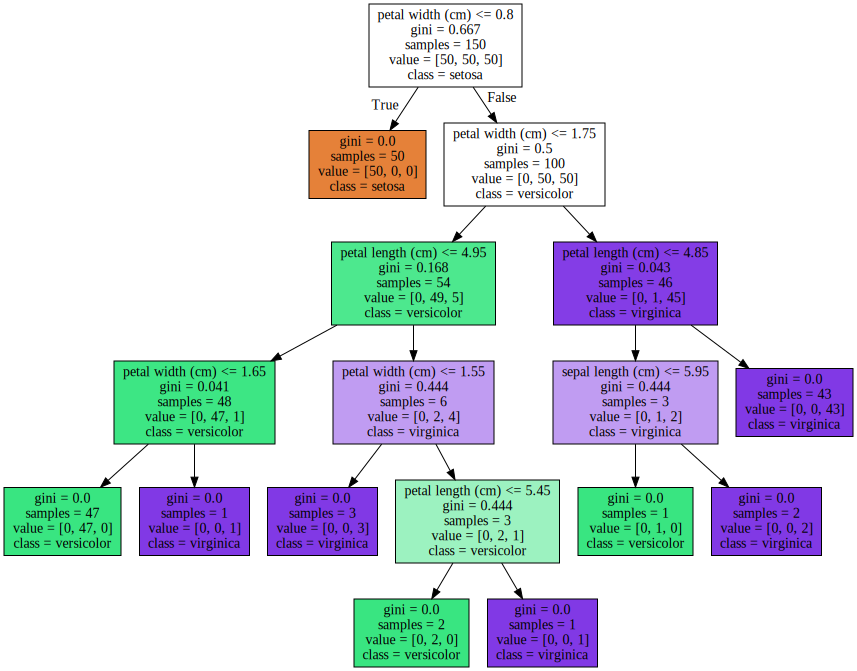

In [42]:
import graphviz
# DOT data - since graphviz accepts data in DOT we will convert our tree into a compatable format 
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [43]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [44]:
pip install dtreeviz

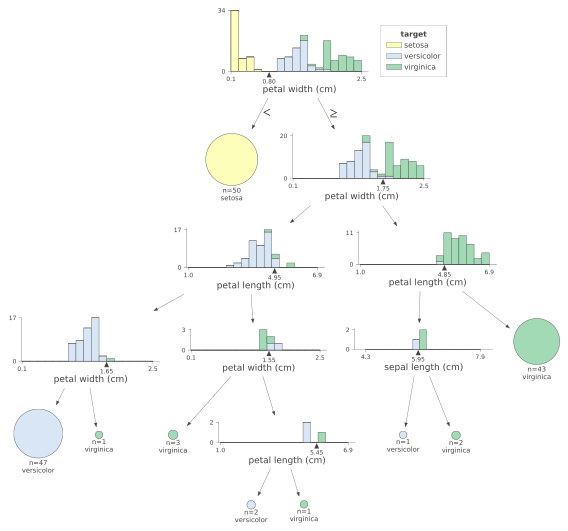

In [45]:
# Plot Decision Tree with dtreeviz Package
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
viz

### Resources
- https://mljar.com/blog/visualize-decision-tree/ (source code)
- https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
- https://explained.ai/decision-tree-viz/
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html